In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
initial_f = 'initialStateDistribution.txt'
trans_f = 'transitionMatrix.txt'
emission_f = 'emissionMatrix.txt'
obs_f = 'observations.txt'

initial = np.loadtxt(initial_f, dtype=float)
trans = np.loadtxt(trans_f, dtype=float)
emission = np.loadtxt(emission_f, dtype=float)
obs = np.loadtxt(obs_f, dtype=int)

In [3]:
L = np.zeros((trans.shape[0],obs.shape[0]))
Fi = np.zeros((obs.shape[0],trans.shape[0]))

In [4]:
# initial state
L.T[0] = L.T[0] + np.log(initial) + np.log(emission[:,obs[0]])

In [ ]:
for i in range(1,obs.shape[0]):
    temp0 = L.T[i-1][:,np.newaxis] + np.log(trans)
    temp1 = np.max(temp0,axis = 0) + np.log(emission[:,obs[i]])
    temp2 = np.argmax(temp0,axis = 0)
    L.T[i] = L.T[i] + temp1
    Fi[i] = Fi[i] + temp2

In [ ]:
state = np.zeros(obs.shape[0])
state[-1] = np.argmax(L.T[-1])
for i in range(obs.shape[0]-2,-1,-1):
    state[i] = Fi[i+1][int(state[i+1])]

In [ ]:
x = np.linspace(0,54999,55000)

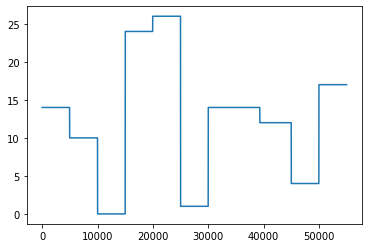

In [36]:
plt.plot(x,state)
plt.show()

In [58]:
alphaDict = dict(zip(range(1,28), string.ascii_lowercase + ' '))
message = []
count = 0
for t in range(obs.shape[0]-1):
    if state[t] == state[t+1]:
        count += 1
    else: count = 0
    if count > 4500:
        message.append(alphaDict.get(state[t]+1))
        count = 0
result = ''.join(message)

In [59]:
result

'okay boomer'